# Частина третя: Аналіз датасет c `Kaggle.com` - [link](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/data)

In [601]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
%matplotlib inline

## Необхідно виконати:
* Прочитайте csv файл (використовуйте функцію `read_csv`)
* Виведіть перші п'ять рядків (використовується функція `head`)
* Виведіть розміри датасету (використовуйте атрибут `shape`)


In [602]:
df = pd.read_csv('bestsellers with categories.csv')

In [603]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [604]:
df.shape

(550, 7)

### Про скільки книг зберігає дані датасет?

In [605]:
# print(f'* Про скільки книг зберігає дані датасет?\nВідповідь: {df.shape[0]} книг')
num_unique_books = df.Name.nunique()
md(f'* Про скільки книг зберігає дані датасет?\\\n **Відповідь**: {num_unique_books} книг')

* Про скільки книг зберігає дані датасет?\
 **Відповідь**: 351 книг

## Нові назви змінних

In [606]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns
# df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

## Первинне дослідження даних
* Чи є в якихось змінних пропуски? (Так / ні)
* Які є унікальні жанри?
* Максимальна ціна?
* Мінімальна ціна?
* Середня ціна?
* Медіанна ціна?

In [607]:
print('кількість пропусків:')
df.isna().sum()

кількість пропусків:


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [608]:
is_na = "Так" if df.isna().sum().sum() else "ні"
md(f'* Чи є в якихось змінних пропуски? \\\n  **Відповідь**: {is_na}')

* Чи є в якихось змінних пропуски? \
  **Відповідь**: ні

In [609]:
unique_genres = [g for g in df['genre'].unique()]
genres_str = ', '.join(unique_genres)
md(f'* Які є унікальні жанри?\\\n **Відповідь**: {genres_str}')

* Які є унікальні жанри?\
 **Відповідь**: Non Fiction, Fiction

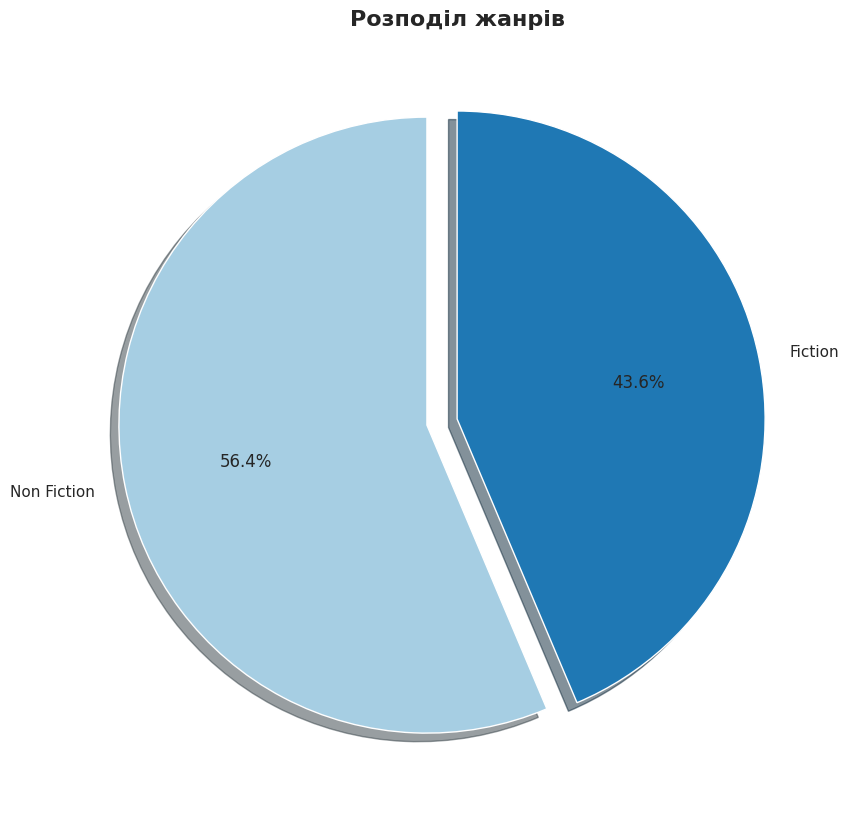

In [610]:
genre_counts = df['genre'].value_counts().sort_values(ascending=False)
colors = plt.cm.Paired(range(len(genre_counts)))
explode = [0.1 if i == genre_counts.idxmax() else 0 for i in genre_counts.index]
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
# plt.title('Genre duistribution', fontsize=16, fontweight='bold'
plt.title('Розподіл жанрів', fontsize=16, fontweight='bold')
plt.show()

In [611]:
max_price = df['price'].max()
md(f'* Максимальна ціна?\\\n **Відповідь**: {max_price}')

* Максимальна ціна?\
 **Відповідь**: 105

In [612]:
min_price = df['price'].min()
md(f'* Мінімальна ціна?\\\n **Відповідь**: {min_price}')

* Мінімальна ціна?\
 **Відповідь**: 0

In [613]:
mean_price = df['price'].mean()
md(f'* Середня ціна?\\\n **Відповідь**: {mean_price}')

* Середня ціна?\
 **Відповідь**: 13.1

In [614]:
median_price = df['price'].median()
md(f'* Медіанна ціна?\\\n **Відповідь**: {median_price}')

* Медіанна ціна?\
 **Відповідь**: 11.0

## Пошук та сортування даних
* Який рейтинг у датасеті найвищий?
* Скільки книг мають такий рейтинг?
* Яка книга має найбільше відгуків?
* З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
* Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
* Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
* Яка книга остання у відсортованому списку?

In [615]:
max_rating = df['user_rating'].max()
md(f'* Який рейтинг у датасеті найвищий?\\\n **Відповідь**: {max_rating}')

* Який рейтинг у датасеті найвищий?\
 **Відповідь**: 4.9

In [616]:
max_rating_count = len(df.query(f'user_rating == {max_rating}'))
md(f'* Скільки книг мають такий рейтинг?\\\n **Відповідь**: {max_rating_count}')

* Скільки книг мають такий рейтинг?\
 **Відповідь**: 52

In [617]:
book_most_revieved_idx = df['reviews'].idxmax()
book_most_revieved = df.loc[book_most_revieved_idx]
md(f'* Яка книга має найбільше відгуків?\\\n **Відповідь**: _Назва_ - {book_most_revieved["name"]}, _автор_ - {book_most_revieved.author}')

* Яка книга має найбільше відгуків?\
 **Відповідь**: _Назва_ - Where the Crawdads Sing, _автор_ - Delia Owens

In [618]:
df_2015 = df[(df['year'] == 2015)]
df_2015_max_price_idx = df_2015['price'].idxmax()
book_in_2015_max_price = df_2015.loc[df_2015_max_price_idx]
md(f'* З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\\\n **Відповідь**: \\\n \
_Назва_ - {book_in_2015_max_price["name"]} \\\n \
_автор_ - {book_in_2015_max_price.author}  \\\n \
_ціна_ - {book_in_2015_max_price.price}')

* З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\
 **Відповідь**: \
 _Назва_ - Publication Manual of the American Psychological Association, 6th Edition \
 _автор_ - American Psychological Association  \
 _ціна_ - 46

In [619]:
df_fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
md(f'* Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?\\\n **Відповідь**: {df_fiction_2010.shape[0]}')

* Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?\
 **Відповідь**: 20

In [620]:
df_49_rating_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
md(f'* Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?\\\n **Відповідь**: {df_49_rating_2010_2011.shape[0]}')

* Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?\
 **Відповідь**: 1

In [621]:
df_2015_prce_below_8_sorted = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_index = len(df_2015_prce_below_8_sorted) - 1
last_book_info = df_2015_prce_below_8_sorted.loc[last_book_index]
# last_book_info = df_2015_prce_below_8_sorted.tail(1)[['name', 'author']]
md(f'* Яка книга остання у відсортованому списку?\\\n **Відповідь**: \\\n \
_Назва_ - {last_book_info["name"]} \\\n \
_автор_ - {last_book_info.author} ')

* Яка книга остання у відсортованому списку?\
 **Відповідь**: \
 _Назва_ - Adult Coloring Book: Stress Relieving Animal Designs \
 _автор_ - Blue Star Coloring 

## Агрегування даних та з'єднання таблиць
* Максимальна ціна для жанру Fiction?
* Мінімальна ціна для жанру Fiction?
* Максимальна ціна для жанру Non Fiction?
* Мінімальна ціна для жанру Non Fiction?
* Якої розмірності вийшла таблиця?
* Який автор має найбільше книг?
* Скільки книг цього автора?
* У якого автора середній рейтинг мінімальний?
* Який у цього автора середній рейтинг?
* Який автор перший у списку?

In [622]:
df_fiction_non_fiction_price = df[['genre', 'price']].groupby('genre').agg(['min', 'max'])
print('Новий датафрейм:')
df_fiction_non_fiction_price

Новий датафрейм:


price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [623]:
# max_fiction_price = df[(df['genre'] == 'Fiction')].max()['price']
max_fiction_price = df_fiction_non_fiction_price.loc['Fiction']['price', 'max']
md(f'* Максимальна ціна для жанру Fiction?\\\n **Відповідь**: {max_fiction_price}')

* Максимальна ціна для жанру Fiction?\
 **Відповідь**: 82

In [624]:
# min_fiction_price = df[(df['genre'] == 'Fiction')].min()['price']
min_fiction_price = df_fiction_non_fiction_price.loc['Fiction']['price', 'min']
md(f'* Мінімальна ціна для жанру Fiction?\\\n **Відповідь**: {min_fiction_price}')

* Мінімальна ціна для жанру Fiction?\
 **Відповідь**: 0

In [625]:
# max_non_fiction_price = df[(df['genre'] == 'Non Fiction')].max()['price']
max_non_fiction_price = df_fiction_non_fiction_price.loc['Non Fiction']['price', 'max']
md(f'* Максимальна ціна для жанру Non Fiction?\\\n **Відповідь**: {max_non_fiction_price}')

* Максимальна ціна для жанру Non Fiction?\
 **Відповідь**: 105

In [626]:
# min_non_fiction_price = df[(df['genre'] == 'Fiction')].min()['price']
min_non_fiction_price = df_fiction_non_fiction_price.loc['Non Fiction']['price', 'min']
md(f'* Мінімальна ціна для жанру Non Fiction?\\\n **Відповідь**; {min_non_fiction_price}')

* Мінімальна ціна для жанру Non Fiction?\
 **Відповідь**; 0

In [627]:
df_num_books_per_author = df[['author', 'name']].groupby('author').agg('count').reset_index()
df_num_books_per_author.columns = ['author', 'books_count']
print("Датафрейм авторів з кількістю книг:")
df_num_books_per_author

Датафрейм авторів з кількістю книг:


,author,books_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [628]:
md(f'* Якої розмірності вийшла таблиця?\\\n **Відповідь**: \\\n \
_Рядків_: {df_num_books_per_author.shape[0]} \\\n \
_Колонок_: {df_num_books_per_author.shape[1]}')

* Якої розмірності вийшла таблиця?\
 **Відповідь**: \
 _Рядків_: 248 \
 _Колонок_: 2

In [629]:
most_books_author = df_num_books_per_author.loc[df_num_books_per_author['books_count'].idxmax()]
md(f'* Який автор має найбільше книг?\\\n **Відповідь**: {most_books_author.author}')

* Який автор має найбільше книг?\
 **Відповідь**: Jeff Kinney

In [630]:
num_books = df_num_books_per_author.max()
md(f'* Скільки книг цього автора?\\\n **Відповідь**: {most_books_author.books_count}')

* Скільки книг цього автора?\
 **Відповідь**: 12

In [631]:
df_author_avg_rating = df[['author', 'user_rating']].groupby('author').agg('mean').round(2).reset_index()
df_author_avg_rating.columns = ['author', 'avg_rating']
print('Новий датафрейм:')
df_author_avg_rating

Новий датафрейм:


,author,avg_rating
0,Abraham Verghese,4.60
1,Adam Gasiewski,4.40
2,Adam Mansbach,4.80
3,Adir Levy,4.80
4,Admiral William H. McRaven,4.70
...,...,...
243,Walter Isaacson,4.57
244,William Davis,4.40
245,William P. Young,4.60
246,Wizards RPG Team,4.80


In [632]:
author_witn_min_rating = df_author_avg_rating.loc[df_author_avg_rating['avg_rating'].idxmin()]
md(f'* У якого автора середній рейтинг мінімальний?\\\n **Відповідь**: {author_witn_min_rating.author}')

* У якого автора середній рейтинг мінімальний?\
 **Відповідь**: Donna Tartt

In [633]:
md(f'* Який у цього автора середній рейтинг?\\\n **Відповідь**: {author_witn_min_rating.avg_rating}')

* Який у цього автора середній рейтинг?\
 **Відповідь**: 3.9

In [634]:
# df_author_books_rating = pd.concat([df_num_books_per_author.set_index('author'), df_author_avg_rating.set_index('author')], axis=1)
df_author_books_rating = pd.merge(df_author_avg_rating, df_num_books_per_author, on='author', how='inner')
df_author_books_rating

,author,avg_rating,books_count
0,Abraham Verghese,4.60,2
1,Adam Gasiewski,4.40,1
2,Adam Mansbach,4.80,1
3,Adir Levy,4.80,1
4,Admiral William H. McRaven,4.70,1
...,...,...,...
243,Walter Isaacson,4.57,3
244,William Davis,4.40,2
245,William P. Young,4.60,2
246,Wizards RPG Team,4.80,3


In [635]:
df_author_books_rating_sorted = df_author_books_rating.sort_values(['books_count', 'avg_rating']).reset_index(drop=True)
df_author_books_rating_sorted

,author,avg_rating,books_count
0,Muriel Barbery,4.00,1
1,Chris Cleave,4.10,1
2,Ian K. Smith M.D.,4.10,1
3,Pierre Dukan,4.10,1
4,Elizabeth Strout,4.20,1
...,...,...,...
243,American Psychological Association,4.50,10
244,Suzanne Collins,4.66,11
245,Gary Chapman,4.74,11
246,Rick Riordan,4.77,11


In [636]:
md(f'* Який автор перший у списку?\\\n **Відповідь**: {df_author_books_rating_sorted.iloc[0]["author"]}')

* Який автор перший у списку?\
 **Відповідь**: Muriel Barbery

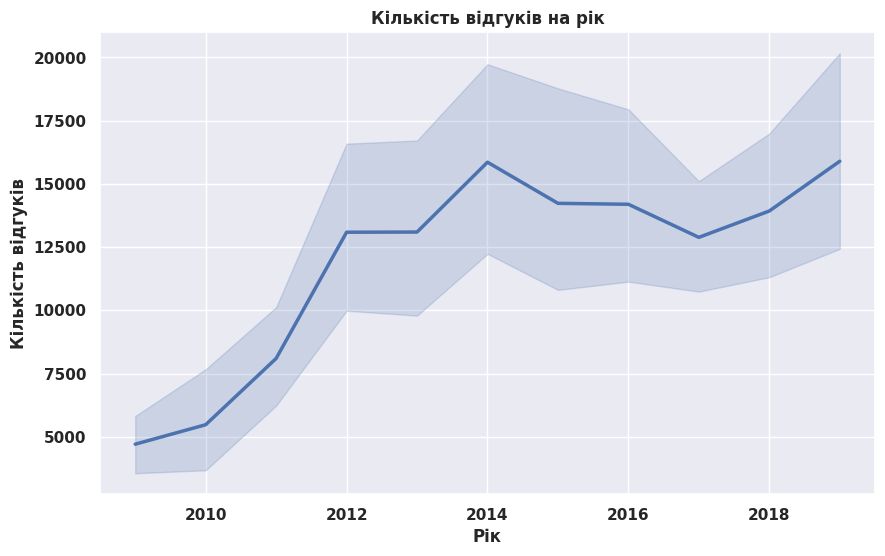

In [637]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='reviews', data=df, linewidth=2.5)
# plt.xlabel("Year", fontweight='bold')
# plt.ylabel("Reviews count", fontweight='bold')
# plt.title("Number of reviews per year", fontweight='bold')
plt.xlabel("Рік", fontweight='bold')
plt.ylabel("Кількість відгуків", fontweight='bold')
plt.title("Кількість відгуків на рік", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

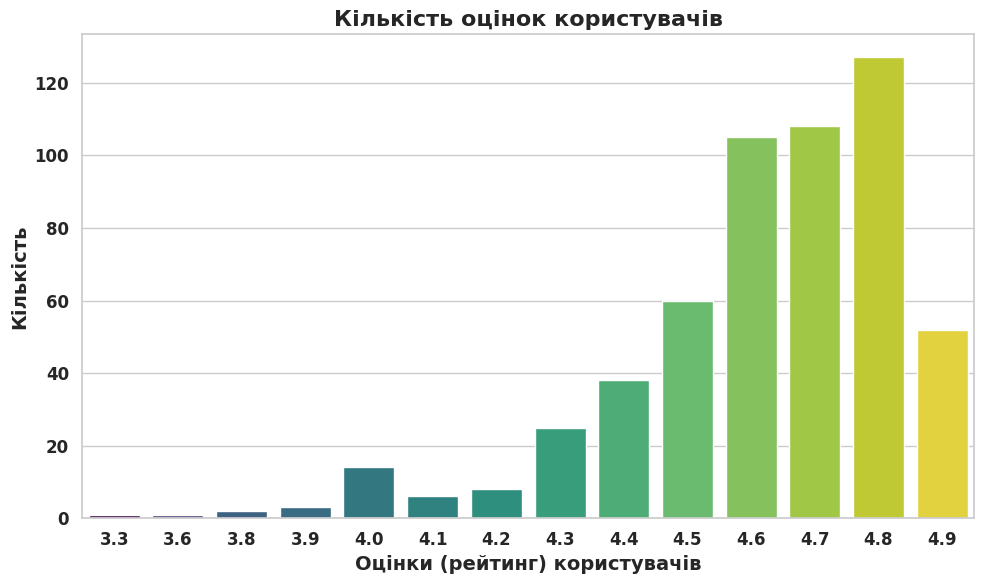

In [638]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="user_rating", hue="user_rating", data=df, palette='viridis', legend=False)
# plt.xlabel("Users rating", fontsize=14, fontweight='bold')
# plt.ylabel("Count", fontsize=14, fontweight='bold')
# plt.title("Number of user ratings", fontsize=16, fontweight='bold')
plt.xlabel("Оцінки (рейтинг) користувачів", fontsize=14, fontweight='bold')
plt.ylabel("Кількість", fontsize=14, fontweight='bold')
plt.title("Кількість оцінок користувачів", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

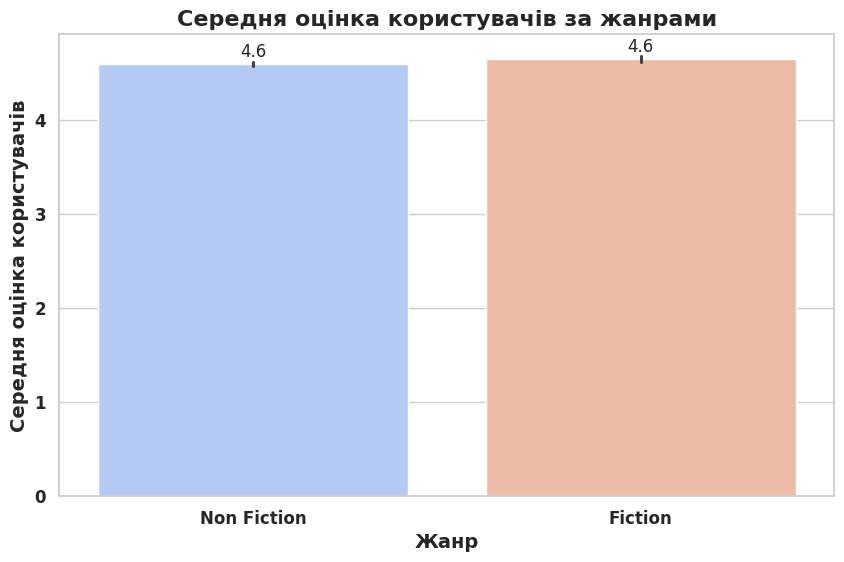

In [639]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='genre', y='user_rating', hue='genre', data=df, palette='coolwarm')
# plt.title('Average User Rating by Genre', fontsize=16, fontweight='bold')
# plt.xlabel('Genre', fontsize=14, fontweight='bold')
# plt.ylabel('Average User Rating', fontsize=14, fontweight='bold')
plt.title('Середня оцінка користувачів за жанрами', fontsize=16, fontweight='bold')
plt.xlabel('Жанр', fontsize=14, fontweight='bold')
plt.ylabel('Середня оцінка користувачів', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.show()

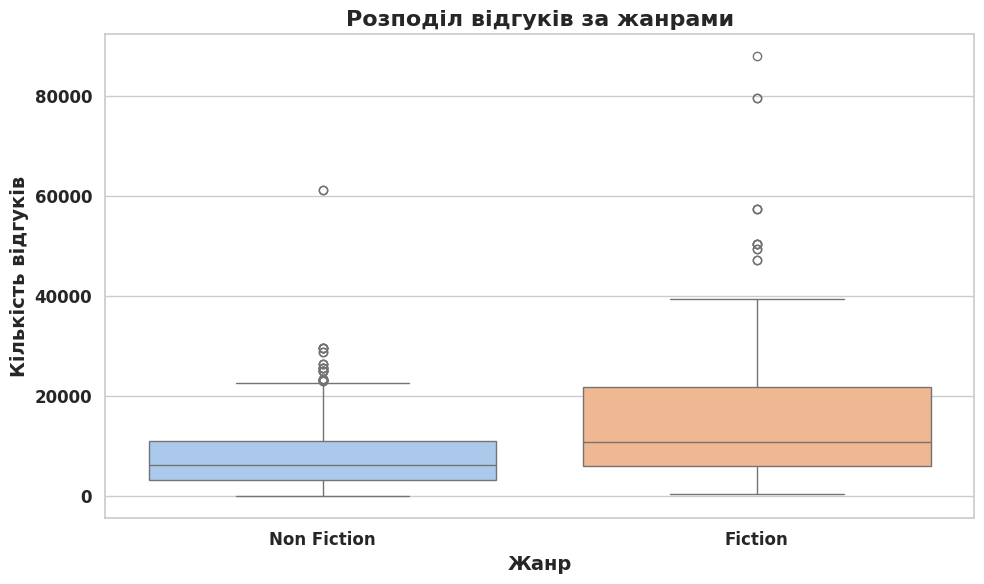

In [640]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='reviews', data=df, palette='pastel', hue='genre', legend=False)
# plt.title('Distribution of Reviews by Genre', fontsize=16, fontweight='bold')
# plt.xlabel('Genre', fontsize=14, fontweight='bold')
# plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Розподіл відгуків за жанрами', fontsize=16, fontweight='bold')
plt.xlabel('Жанр', fontsize=14, fontweight='bold')
plt.ylabel('Кількість відгуків', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

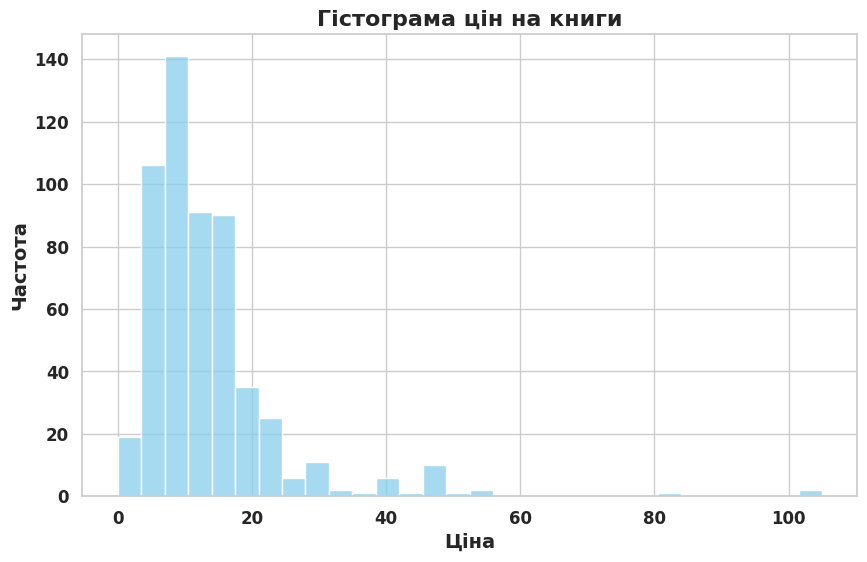

In [641]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=False, color='skyblue')
# plt.title('Histogram of Book Prices', fontsize=16, fontweight='bold')
# plt.xlabel('Price', fontsize=14, fontweight='bold')
# plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Гістограма цін на книги', fontsize=16, fontweight='bold')
plt.xlabel('Ціна', fontsize=14, fontweight='bold')
plt.ylabel('Частота', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


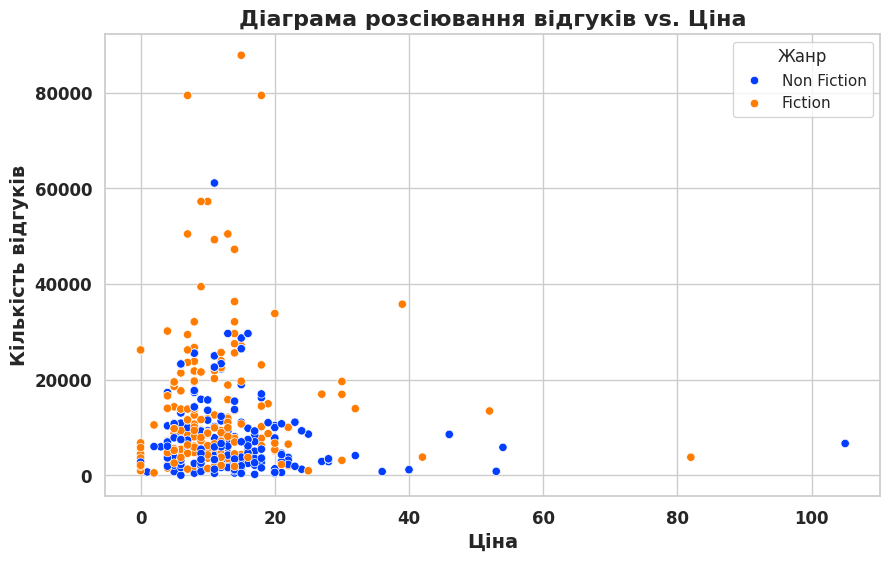

In [642]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=df, hue='genre', palette='bright')
# plt.title('Scatter Plot of Reviews vs. Price', fontsize=16, fontweight='bold')
# plt.xlabel('Price', fontsize=14, fontweight='bold')
# plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Діаграма розсіювання відгуків vs. Ціна', fontsize=16, fontweight='bold')
plt.xlabel('Ціна', fontsize=14, fontweight='bold')
plt.ylabel('Кількість відгуків', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
# plt.legend(title='Genre')
plt.legend(title='Жанр')
plt.show()

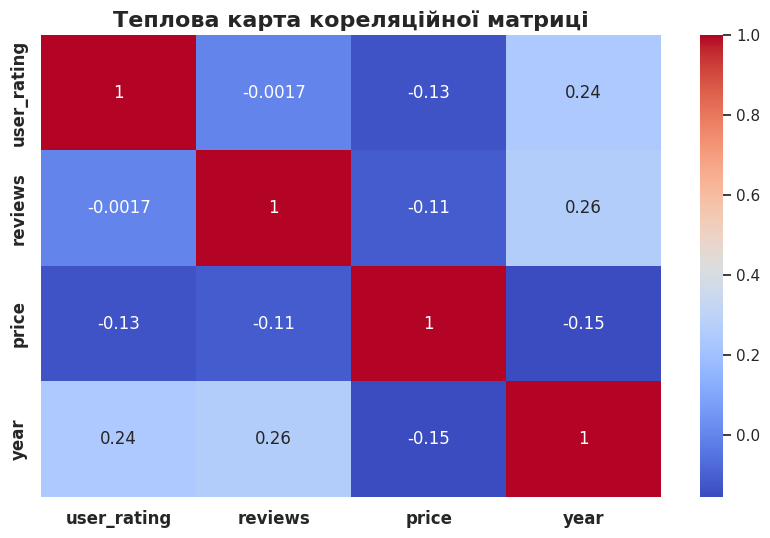

In [643]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Heatmap of Correlation Matrix', fontsize=16, fontweight='bold')
plt.title('Теплова карта кореляційної матриці', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()